In [379]:
import numpy as np
import pandas as pd

In [380]:
nobs = 1500

In [381]:
data_dic = {}

In [382]:
data_dic['a'] = np.random.randint(30,40,nobs)

In [383]:
b = np.random.randn(nobs)
b_2 = np.power(b, 2)
b_3 = np.power(b, 3)
b_sin = np.sin(b)

In [384]:
data_dic['b'] = b
data_dic['b_2'] = b_2
data_dic['b_3'] = b_3
data_dic['b_sin'] = b_sin

In [385]:
data_dic['c'] = np.random.beta(3,6,nobs)

In [386]:
data_dic['sqrt_a'] = np.sqrt(data_dic['a'])

In [387]:
data = pd.DataFrame(data_dic)

In [388]:
data['target'] = 2*data['sqrt_a'] + 0.1*data['b_2'] + 0.12 * data['b_sin']  - data['c'] + 0.1*np.random.randn(nobs)

In [389]:
data.head()

,a,b,b_2,b_3,b_sin,c,sqrt_a,target
0,35,1.415863,2.004669,2.838338,0.988022,0.183146,5.916080,12.010829
1,39,0.242372,0.058744,0.014238,0.240006,0.116084,6.244998,12.554481
2,31,-0.475096,0.225716,-0.107237,-0.457424,0.331811,5.567764,10.867355
3,35,-1.176812,1.384887,-1.629751,-0.923387,0.423555,5.916080,11.436638
4,38,-0.340062,0.115642,-0.039326,-0.333546,0.257380,6.164414,11.960898


In [390]:
data.to_csv('data.csv')

## Find the model

In [391]:
target = data['target']

In [392]:
predictors = data.drop('target', 1)

In [393]:
from sklearn import cross_validation, datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [394]:
# def scatter_matrix(X):
#     feature_count = len(X.columns)
#     fig,ax = plt.subplots(ncols=feature_count,nrows=feature_count,figsize=(10*feature_count, 10*feature_count))

#     for i,feature_i in enumerate(X):
#         for j,feature_j in enumerate(X):
#             ax[i][j].scatter(X[feature_i],X[feature_j])
#             ax[i][j].set_xlabel('Feature ' + str(feature_j))
#             ax[i][j].set_ylabel('Feature ' + str(feature_i))

# scatter_matrix(data)

In [395]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
                                        predictors, target, test_size=0.3)

In [396]:
from sklearn import linear_model

In [397]:
models = {}
models['lin_reg'] = linear_model.LinearRegression()
models['ridge'] = linear_model.Ridge()
models['lasso'] = linear_model.Lasso(alpha=.002)
models['elasticnet'] = linear_model.ElasticNet()

In [398]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
                                        predictors, target, test_size=0.3)

for name,model in models.iteritems():
    model.fit(X_train,y_train)
    print('Model: '+name)
    print("Score: " + str(model.score(X_test,y_test)))
    sorted_features = sorted(zip(predictors,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
    for feature in sorted_features:
        print(feature)
        
    print("")

Model: elasticnet
Score: 0.663274621874
('a', 0.10131402651220529)
('b', 0.0)
('b_2', 0.0)
('b_3', 0.0)
('b_sin', 0.0)
('c', -0.0)
('sqrt_a', 0.0)

Model: ridge
Score: 0.968801744274
('c', -0.95374249077522089)
('a', 0.16563819053788192)
('b_sin', 0.1200894346675829)
('b_2', 0.095756176193697348)
('sqrt_a', 0.048297149378422631)
('b', 0.001484768179614452)
('b_3', -0.00086379507955929805)

Model: lin_reg
Score: 0.969662634002
('sqrt_a', 1.6906970913803507)
('c', -0.9958359311502526)
('b_sin', 0.18934266303485578)
('b_2', 0.095602711122214273)
('b', -0.062543741916802217)
('a', 0.025504270359696123)
('b_3', 0.0065798982389769032)

Model: lasso
Score: 0.968161066859
('c', -0.903916188745153)
('a', 0.1695641822384982)
('b_sin', 0.11511999044303113)
('b_2', 0.094670716775879502)
('b', 0.0)
('b_3', -0.0)
('sqrt_a', 0.0)



In [399]:
# model.score?

In [400]:
# cross_validation.ShuffleSplit()

In [401]:
shuffler = cross_validation.ShuffleSplit(nobs)


for name,model in models.iteritems():
    score = cross_validation.cross_val_score(model, predictors, target, n_jobs=1, cv=shuffler)
    print('Model: ' + name)
    print(score)
    print("Score: " + str(np.mean(score)) + " with STD: " + str(np.std(score)))
    sorted_features = sorted(zip(predictors,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
    for feature in sorted_features:
        print(feature)
        
    print("")

Model: elasticnet
[ 0.67752636  0.66673424  0.73034285  0.63609179  0.70031561  0.69384961
  0.65854491  0.64555668  0.66693146  0.66319582]
Score: 0.673908931574 with STD: 0.0264155018591
('a', 0.10131402651220529)
('b', 0.0)
('b_2', 0.0)
('b_3', 0.0)
('b_sin', 0.0)
('c', -0.0)
('sqrt_a', 0.0)

Model: ridge
[ 0.97042593  0.97146335  0.95940112  0.97168507  0.96550999  0.9612637
  0.96664623  0.96925424  0.96704625  0.9706288 ]
Score: 0.967332468413 with STD: 0.00404658475965
('c', -0.95374249077522089)
('a', 0.16563819053788192)
('b_sin', 0.1200894346675829)
('b_2', 0.095756176193697348)
('sqrt_a', 0.048297149378422631)
('b', 0.001484768179614452)
('b_3', -0.00086379507955929805)

Model: lin_reg
[ 0.95816943  0.96731721  0.97438685  0.97209216  0.96608136  0.96500742
  0.95786431  0.9683246   0.96568287  0.9635683 ]
Score: 0.965849451811 with STD: 0.00498877459806
('sqrt_a', 1.6906970913803507)
('c', -0.9958359311502526)
('b_sin', 0.18934266303485578)
('b_2', 0.095602711122214273)
('b

In [402]:
from sklearn import cross_validation

import matplotlib.pyplot as plt
%matplotlib inline

def plot_overfit(X,y,model_obj,param_ranges,param_static=None): 
    for parameter,parameter_range in param_ranges.iteritems():
        avg_train_score, avg_test_score = [],[]
        std_train_score, std_test_score = [],[]
        
        for param_val in parameter_range:
            param = {parameter:param_val}
            if param_static:
                param.update(param_static)
                
            model = model_obj(**param)
            
            train_scores,test_scores = [],[]
            for i in range(5):
                X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size = .5)
                model.fit(X_train,y_train)
                
                train_scores.append(model.score(X_train,y_train))
                test_scores.append(model.score(X_test,y_test))
            
            avg_train_score.append(np.mean(train_scores))
            avg_test_score.append(np.mean(test_scores))
            
            std_train_score.append(np.std(train_scores))
            std_test_score.append(np.std(test_scores))
            
        fig,ax = plt.subplots()
        ax.errorbar(parameter_range,avg_train_score,yerr=std_train_score,label='training score')
        ax.errorbar(parameter_range,avg_test_score,yerr=std_test_score,label='testing score')
        
        ax.set_xlabel(parameter)
        ax.set_ylabel('score')
        ax.legend(loc=0)

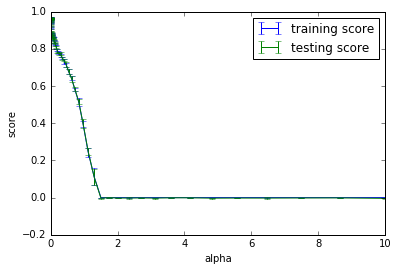

In [403]:
lasso = linear_model.Lasso
plot_overfit(predictors, target,lasso,{'alpha':np.logspace(-4,1,80)})

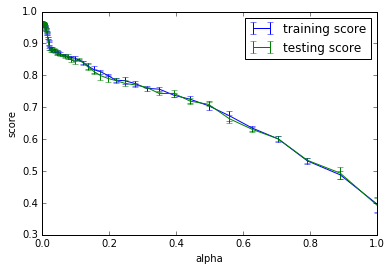

In [404]:
lasso = linear_model.Lasso
plot_overfit(predictors, target,lasso,{'alpha':np.logspace(-4,0,80)})

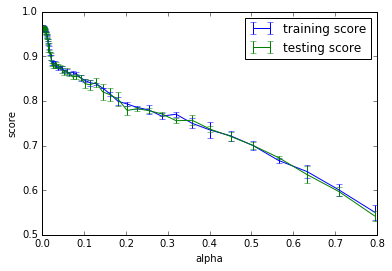

In [405]:
lasso = linear_model.Lasso
plot_overfit(predictors, target,lasso,{'alpha':np.logspace(-4,-.1,80)})

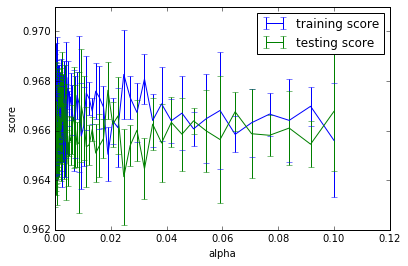

In [406]:
ridge = linear_model.Ridge
plot_overfit(predictors, target,ridge,{'alpha':np.logspace(-4,-1,80)})

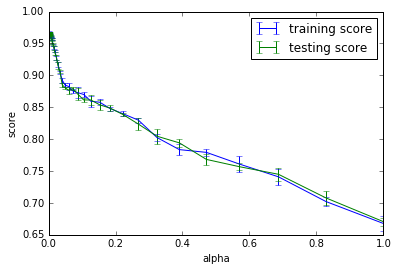

In [407]:
elastic = linear_model.ElasticNet
plot_overfit(predictors, target,elastic,{'alpha':np.logspace(-4,0,50)})

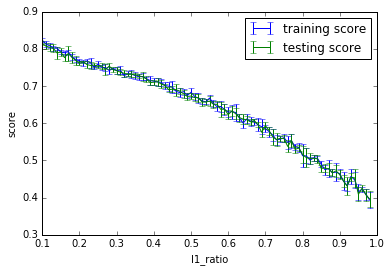

In [408]:
elastic = linear_model.ElasticNet
plot_overfit(predictors, target,elastic,{'l1_ratio':np.arange(0.1,0.99,.01)})

In [409]:
from sklearn import grid_search

In [410]:
lasso = linear_model.Lasso()

parameters = {'normalize':(True,False),
              'alpha':np.logspace(-4,-.1,30)}
grid_searcher = grid_search.GridSearchCV(lasso, parameters)
grid_searcher.fit(predictors, target)

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': (True, False), 'alpha': array([  1.00000e-04,   1.36296e-04,   1.85766e-04,   2.53191e-04,
         3.45089e-04,   4.70342e-04,   6.41057e-04,   8.73734e-04,
         1.19086e-03,   1.62310e-03,   2.21222e-03,   3.01516e-03,
         4.10954e-03,   5.60113e-03,   7.63411e-03...    1.68883e-01,   2.30181e-01,   3.13727e-01,   4.27597e-01,
         5.82797e-01,   7.94328e-01])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [411]:
grid_searcher.best_params_

{'alpha': 0.0001, 'normalize': True}

In [412]:
best_model = grid_searcher.best_estimator_

In [413]:
best_model.coef_

array([ 0.1173985 ,  0.        ,  0.09489885,  0.        ,  0.11190682,
       -0.97785961,  0.60706067])

In [414]:
best_model.score(X_test,y_test)

0.96935006117365252

In [415]:
best_model

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [416]:
import statsmodels.api as sm

In [417]:

predictors = sm.add_constant(predictors)


In [418]:
model = sm.OLS(target, predictors)
results = model.fit()

In [419]:
results.params

const    -0.053064
a        -0.001763
b        -0.076892
b_2       0.097270
b_3       0.009022
b_sin     0.200257
c        -1.002776
sqrt_a    2.019904
dtype: float64

In [420]:
predictors.head()

,const,a,b,b_2,b_3,b_sin,c,sqrt_a
0,1,35,1.415863,2.004669,2.838338,0.988022,0.183146,5.916080
1,1,39,0.242372,0.058744,0.014238,0.240006,0.116084,6.244998
2,1,31,-0.475096,0.225716,-0.107237,-0.457424,0.331811,5.567764
3,1,35,-1.176812,1.384887,-1.629751,-0.923387,0.423555,5.916080
4,1,38,-0.340062,0.115642,-0.039326,-0.333546,0.257380,6.164414


In [421]:
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     6178.
Date:                Fri, 30 Sep 2016   Prob (F-statistic):               0.00
Time:                        10:44:50   Log-Likelihood:                 1343.5
No. Observations:                1500   AIC:                            -2671.
Df Residuals:                    1492   BIC:                            -2628.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0531      1.664     -0.032      0.9